In [4]:
import os
import glob
import pandas as pd 
import numpy as np
%import plotnine as p9 https://andysbrainbook.readthedocs.io/en/latest/index.html
https://andysbrainbook.readthedocs.io/en/latest/index.html
https://andysbrainbook.readthedocs.io/en/latest/index.html

import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from scipy import stats
import statsmodels as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression

UsageError: Line magic function `%import` not found.


In [5]:
DIR=os.path.join("/NAS","tupac","protocoles","PULSE")

In [149]:
CLI_COMPLET=os.path.join(DIR,"StatPulseKFE.xlsx")
GroupData_Full = pd.read_excel(CLI_COMPLET,index_col=0,engine='openpyxl')
GroupData_Full.index=GroupData_Full.index.astype(str)

In [165]:
GroupData_Full.columns

Index(['TOTAL_CAFEINE_V0', 'CONSO_TABAC_V0', 'CONSO_ALCOOL_V0', 'AGE', 'Sexe',
       'IMC_V0', 'Disease_duration', 'Time_from_PS_to_inclusion', 'ALS_PHENO',
       'Deglutition_V0', 'RILUZOLE', 'ECAS_SPE_V0', 'ECAS_NONSPE_V0',
       'ECAS_Total_V0', 'Niveau_educ', 'Deces', 'Survival_time',
       'Score_ALSFRS_V0', 'ALSFRS_rate_V0', 'NfL', 'SNP', 'CYP1A2', 'CYP1A1',
       'AHR', 'POR', 'XDH'],
      dtype='object')

In [150]:
cols=['TOTAL_CAFEINE_V0','AGE','Sexe','IMC_V0','RILUZOLE','Time_from_PS_to_inclusion','CONSO_TABAC_V0','Deglutition_V0','CONSO_ALCOOL_V0','Niveau_educ']
GroupData_Full[cols]

,TOTAL_CAFEINE_V0,AGE,Sexe,IMC_V0,RILUZOLE,Time_from_PS_to_inclusion,CONSO_TABAC_V0,Deglutition_V0,CONSO_ALCOOL_V0,Niveau_educ
ID,,,,,,,,,,
1001,574.0,44.0,1.0,20.160701,1.0,23.0,0.0,2.0,0.00,14.0
1003,145.0,55.0,2.0,26.370238,1.0,15.0,0.0,1.0,0.00,10.0
1004,304.0,67.0,2.0,16.233091,1.0,11.0,0.0,2.0,0.00,9.0
1005,981.1,51.0,1.0,32.111952,1.0,13.0,0.0,1.0,1.00,20.0
1007,240.5,63.0,2.0,17.099278,1.0,12.0,0.0,1.0,0.46,16.0
...,...,...,...,...,...,...,...,...,...,...
19042,731.5,67.0,1.0,25.648918,1.0,6.0,0.0,1.0,0.14,9.0
19043,538.0,66.0,1.0,21.870000,1.0,11.0,0.0,1.0,0.29,12.0
19044,363.5,70.0,2.0,29.320000,1.0,NaN,0.0,1.0,0.14,9.0


In [151]:
list_subj_ima=[]
for ima in glob.iglob(os.path.join(DIR,"VBM","smwc1sub-*.nii")) :
    SUBJ=ima.replace(os.path.join(DIR,"VBM","smwc1sub-"),"")[:5]
    if SUBJ.startswith('0'):
        list_subj_ima.append(SUBJ[1:])
    else :
        list_subj_ima.append(SUBJ)

In [152]:
mydesignmatrix=GroupData_Full[cols].loc[GroupData_Full.index.isin(list_subj_ima)].dropna()

In [153]:
mydesignmatrix.insert(len(mydesignmatrix.columns),'intercept',1)

Text(1.7700000000000031, 0.5, 'maps')

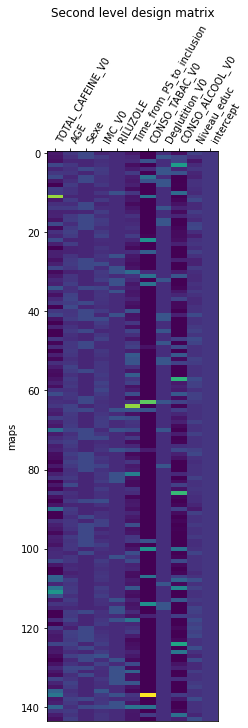

In [154]:
from nilearn import plotting
ax = plotting.plot_design_matrix(mydesignmatrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('maps')

In [156]:
gray_matter_map_filenames=[]
for ind in mydesignmatrix.index :
    if len(ind)==5 :
        gray_matter_map_filenames.append(glob.glob(os.path.join(DIR,"VBM","smwc1sub-"+ind+"*.nii"))[0])
    else :
        gray_matter_map_filenames.append(glob.glob(os.path.join(DIR,"VBM","smwc1sub-0"+ind+"*.nii"))[0])
    

In [157]:
from nilearn.image import resample_to_img

mask_img = resample_to_img(
    gm_mask,
    gray_matter_map_filenames[0],
    interpolation="nearest",
)

In [158]:
from nilearn.glm.second_level import SecondLevelModel
second_level_model = SecondLevelModel(smoothing_fwhm=2.0,mask_img=mask_img)
second_level_model.fit(
    gray_matter_map_filenames,
    design_matrix=mydesignmatrix,
)

SecondLevelModel(mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f2077f18710>,
                 smoothing_fwhm=2.0)

In [166]:
mydesignmatrix.shape

(144, 11)

In [159]:
z_map = second_level_model.compute_contrast(
    second_level_contrast=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0,0],
    output_type="z_score",
)

The FDR=.05-corrected threshold is: inf


/home/romain/.local/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask


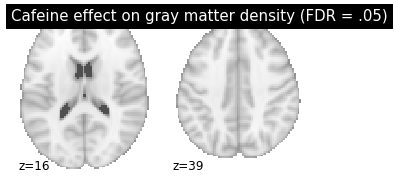

In [164]:
from nilearn.glm import threshold_stats_img

_, threshold = threshold_stats_img(z_map, alpha=0.05, height_control="fdr")
print(f"The FDR=.05-corrected threshold is: {threshold:03g}")

display = plotting.plot_stat_map(
    z_map,
    threshold=threshold,
    colorbar=True,
    display_mode="z",
    cut_coords=[16.6,39],
    title="Cafeine effect on gray matter density (FDR = .05)",
)
plotting.show()

In [162]:
from nilearn.reporting import make_glm_report

icbm152_2009 = datasets.fetch_icbm152_2009()
report = make_glm_report(
    model=second_level_model,
    contrasts=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0,0],
    bg_img=icbm152_2009["t1"],
)

In [163]:
report.save_as_html('VBMreport.html')